In [5]:
import pandas as pd

# Charger le fichier Excel
df= pd.read_excel('../../../Donnees/fichier_traduit.xlsx')

# Afficher les premières lignes des données
print(df.head())


   id             nom  date_ouverture  date_fermeture                 website  \
0  71         La loge          2012.0             NaN          www.la-loge.be   
1   8  Jeune création          2006.0             NaN                     NaN   
2  72       The ister          2011.0             NaN         www.theister.be   
3  73         Komplot          2002.0             NaN            www.kmplt.be   
4  74         Abilene          2011.0             NaN  www.abilenegallery.com   

                        email                             adresse horaires  \
0             info@la-loge.be  Kluisstraat - rue de l’Ermitage 86      NaN   
1     jeunecreation@gmail.com                       24 rue Berthe      NaN   
2            info@theister.be                rue Vandenbranden 42      NaN   
3               info@kmplt.be           295 Avenue Van Volxemlaan      NaN   
4  contact@abilenegallery.com              Rue de la Victoire 163      NaN   

  presentation responsables  ... longitude  

In [2]:
df.describe()

,id,date_ouverture,date_fermeture,created_at,updated_at,latitude,longitude,codepostal,user_id
count,336.000000,336.000000,55.000000,332,332,332.000000,332.000000,2.430000e+02,311.000000
mean,196.330357,1978.872024,1995.127273,2017-05-13 21:02:44.267515136,2017-11-14 01:48:06.479668736,43.993405,-0.526512,7.049388e+04,1.093248
min,1.000000,0.000000,1954.000000,2013-10-10 13:56:59.136000,2013-11-10 10:57:39.385000,-42.483469,-123.369115,1.120000e+02,1.000000
25%,86.750000,1993.000000,1986.000000,2014-04-09 09:01:37.993499904,2015-05-08 00:12:51.228749824,43.616178,1.084944,1.000050e+04,1.000000
50%,203.500000,2007.000000,1994.000000,2016-10-28 22:27:29.817499904,2017-11-23 14:17:22.097499904,47.445838,4.350391,2.100000e+04,1.000000
75%,291.250000,2014.000000,2007.500000,2018-11-21 11:46:56.326249984,2019-04-17 01:01:14.220000,50.737068,10.505366,6.900700e+04,1.000000
max,414.000000,2022.000000,2022.000000,2024-05-17 08:26:23.228000,2024-05-19 09:14:07.812000,56.160254,144.981139,8.320129e+06,9.000000
std,117.885048,218.006336,14.723444,NaN,NaN,15.047952,45.928137,5.329672e+05,0.728002


In [3]:
df.columns

Index(['id', 'nom', 'date_ouverture', 'date_fermeture', 'website', 'email',
       'adresse', 'horaires', 'presentation', 'responsables', 'historique',
       'activites', 'expositions', 'publications', 'events', 'residences',
       'workshop', 'archive', 'librairie', 'coworking', 'education',
       'nb_expos_an', 'nb_artistes_an', 'partenaires', 'created_at',
       'updated_at', 'slug', 'pays', 'ville', 'latitude', 'longitude',
       'adresse_complete', 'codepostal', 'telephone', 'visite', 'user_id',
       'question1', 'réponse1', 'question2', 'réponse2'],
      dtype='object')

In [4]:
# Séparer les variables numériques et non numériques
variables_numeriques = df.select_dtypes(include='number')
variables_non_numeriques = df.select_dtypes(exclude='number')

# Afficher les statistiques descriptives pour les variables numériques
print("Statistiques descriptives des variables numériques :")
print(variables_numeriques.describe())
 

# Afficher les types de variables
print("\nVariables numériques :")
print(variables_numeriques.columns.tolist())

print("\nVariables non numériques :")
print(variables_non_numeriques.columns.tolist())

Statistiques descriptives des variables numériques :
               id  date_ouverture  date_fermeture    latitude   longitude  \
count  336.000000      336.000000       55.000000  332.000000  332.000000   
mean   196.330357     1978.872024     1995.127273   43.993405   -0.526512   
std    117.885048      218.006336       14.723444   15.047952   45.928137   
min      1.000000        0.000000     1954.000000  -42.483469 -123.369115   
25%     86.750000     1993.000000     1986.000000   43.616178    1.084944   
50%    203.500000     2007.000000     1994.000000   47.445838    4.350391   
75%    291.250000     2014.000000     2007.500000   50.737068   10.505366   
max    414.000000     2022.000000     2022.000000   56.160254  144.981139   

         codepostal     user_id  
count  2.430000e+02  311.000000  
mean   7.049388e+04    1.093248  
std    5.329672e+05    0.728002  
min    1.120000e+02    1.000000  
25%    1.000050e+04    1.000000  
50%    2.100000e+04    1.000000  
75%    6.900700

### Carte interactive avec Folium

In [7]:
import folium
import pandas as pd
from IPython.display import display

# Charger les données
donnees= pd.read_excel('../../../Donnees/fichier_traduit.xlsx')

# Filtrer les lignes qui ont des valeurs non nulles pour latitude et longitude
donnees_filtrees = donnees.dropna(subset=['latitude', 'longitude'])

# Créer une carte centrée sur la moyenne des coordonnées valides
moy_latitude = donnees_filtrees['latitude'].mean()
moy_longitude = donnees_filtrees['longitude'].mean()
carte = folium.Map(location=[moy_latitude, moy_longitude], zoom_start=5)

# Ajouter les points
for _, row in donnees_filtrees.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['nom']
    ).add_to(carte)

# Afficher la carte dans le notebook
display(carte)


### Tendance des ouvertures d\'espaces d\'artistes par année

In [6]:
import pandas as pd
import plotly.express as px

# Charger les données
donnees= pd.read_excel('../../../Donnees/fichier_traduit.xlsx')


# Supprimer les valeurs NaN avant la conversion
donnees = donnees[donnees['date_ouverture'].notna()]

# Convertir les valeurs en entiers et en datetime
donnees['date_ouverture'] = pd.to_datetime(donnees['date_ouverture'].astype(int).astype(str), format='%Y', errors='coerce')

# Compter le nombre d'ouvertures par année
ouvertures_par_annee = donnees['date_ouverture'].dt.year.value_counts().sort_index()

# Créer un DataFrame pour la visualisation
df_ouvertures = pd.DataFrame({
    'Année': ouvertures_par_annee.index,
    'Nombre d\'ouvertures': ouvertures_par_annee.values
})

# Créer un graphique en courbes interactif
fig = px.line(df_ouvertures, x='Année', y='Nombre d\'ouvertures',
              title='Tendance des ouvertures d\'espaces d\'artistes par année',
              markers=True)

# Afficher le graphique
fig.show()


### La durée de vie moyenne par mois

In [10]:
import pandas as pd
from datetime import datetime

 

# Convertir les années en dates, en gérant les erreurs de format
df['date_ouverture'] = pd.to_datetime(df['date_ouverture'], errors='coerce', format='%Y')
df['date_fermeture'] = pd.to_datetime(df['date_fermeture'], errors='coerce', format='%Y')

# Remplacer les NaT par la date actuelle pour les fermetures
df['date_fermeture'].fillna(pd.Timestamp(datetime.now()), inplace=True)

# Calculer la durée de vie en mois
df['duree_vie_mois'] = (df['date_fermeture'] - df['date_ouverture']) / pd.Timedelta(days=30)

# Calculer la moyenne des durées de vie
duree_vie_moyenne_parmois = df['duree_vie_mois'].mean()

 

C:\Users\ajebali\AppData\Local\Temp\ipykernel_34412\1480707928.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [9]:
# Créer un boxplot de la durée de vie en mois
fig = px.box(df, y='duree_vie_mois', title='Statistiques Résumées de la Durée de Vie des Espaces')
fig.show()
print(f"La durée de vie moyenne par mois est de {duree_vie_moyenne_parmois} mois.")


La durée de vie moyenne par mois est de 209.74676993797007 mois.


### Analyse des donnees textuelles 

In [12]:
print(df.columns)

Index(['id', 'nom', 'date_ouverture', 'date_fermeture', 'website', 'email',
       'adresse', 'horaires', 'presentation', 'responsables', 'historique',
       'activites', 'expositions', 'publications', 'events', 'residences',
       'workshop', 'archive', 'librairie', 'coworking', 'education',
       'nb_expos_an', 'nb_artistes_an', 'partenaires', 'created_at',
       'updated_at', 'slug', 'pays', 'ville', 'latitude', 'longitude',
       'adresse_complete', 'codepostal', 'telephone', 'visite', 'user_id',
       'question1', 'réponse1', 'question2', 'réponse2', 'duree_vie_mois'],
      dtype='object')


### Nuage de points

C:\Users\ajebali\AppData\Local\Temp\ipykernel_34412\677790798.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





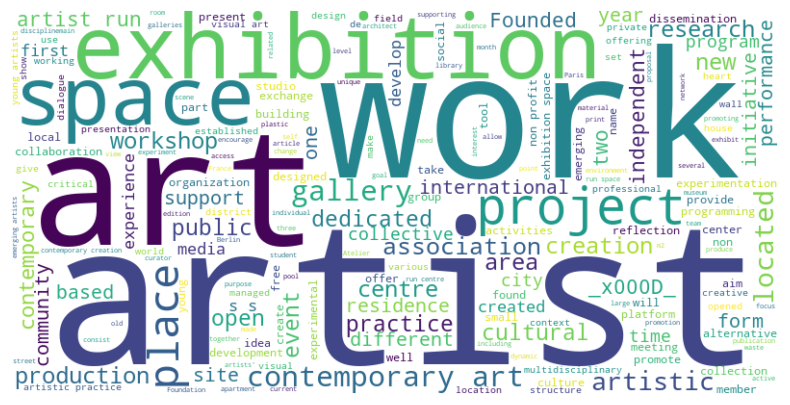

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 

# Remplacement des valeurs NaN par des chaînes vides et conversion de toutes les entrées en chaînes
df['presentation'].fillna('', inplace=True)
df['presentation'] = df['presentation'].apply(str)

# Concaténation de tous les textes en une seule chaîne
text = " ".join(review for review in df['presentation'])

# Génération du nuage de mots
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Identification des Priorités des Espaces :

1) Les mots fréquents comme "exposition", "projet", et "collaboration" indiquent non seulement des activités courantes, mais aussi des éléments prioritaires pour ces espaces. Cela peut signifier une forte orientation vers la création et la présentation d'œuvres d'art ainsi que la promotion de projets collaboratifs.
Focus sur l'Innovation et la Communauté :

2) La présence de mots tels que "innovation", "communautaire", et "éducatif" suggère que ces espaces visent à innover dans le domaine artistique tout en servant de centres pour l'éducation et l'engagement communautaire.
Portée Locale et Internationale :

3) L'utilisation de termes comme "local" et "international" montre que ces espaces fonctionnent à plusieurs niveaux géographiques, ce qui pourrait influencer leur gestion, leur financement, et leur impact culturel.

### Analyse des composantes principales

### Influence des caractéristiques

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
bool_columns=['expositions', 'publications', 'events', 'residences', 'workshop', 
           'archive', 'librairie', 'coworking', 'education']
# Convertir 'f' et 't' en 0 et 1 pour les colonnes spécifiées
for col in bool_columns:
    df[col] = df[col].map({'f': 0, 't': 1}).fillna(0)  # Utilisation de fillna ici pour couvrir les NaN après la conversion

# Sélectionner les colonnes pertinentes
columns = ['expositions', 'publications', 'events', 'residences', 'workshop', 
           'archive', 'librairie', 'coworking', 'education']
data = df[columns]

# Assurer que toutes les valeurs NaN sont traitées
data.fillna(data.mean(), inplace=True)

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Application de PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0 -2.295082  0.183304
1 -2.295082  0.183304
2 -2.295082  0.183304
3 -2.295082  0.183304
4 -2.295082  0.183304


C:\Users\ajebali\AppData\Local\Temp\ipykernel_34412\1743803896.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Methode de coude et score de silhouette pour determiner le nombre idéal de clusters

C:\Users\ajebali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\ajebali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


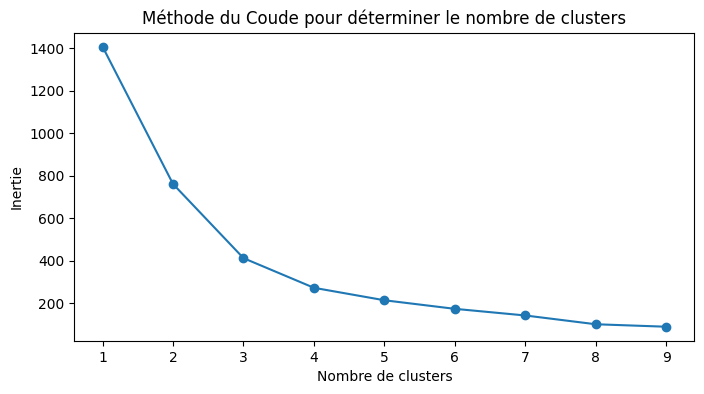

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul de la somme des carrés des distances pour différents nombres de clusters
inertia = []
for k in range(1, 10):  # Tester de 1 à 9 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)  # principal_components provenant de votre PCA
    inertia.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Méthode du Coude pour déterminer le nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


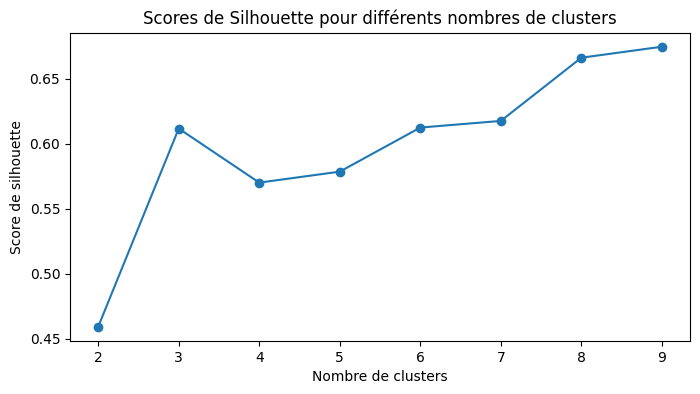

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # La silhouette ne peut être calculée qu'avec au moins 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(principal_components)
    score = silhouette_score(principal_components, clusters)
    silhouette_scores.append(score)

# Visualisation des scores de silhouette
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Scores de Silhouette pour différents nombres de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()


### Clustering selon Activité

In [20]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supposons que `principal_components` et `df['nom']` sont déjà définis
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Création du DataFrame pour Plotly
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Nom'] = df['nom']  # Assurez-vous que 'nom' est le nom de votre colonne des noms des espaces

# Visualisation avec Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                 hover_name='Nom',  # Utilisez hover_name pour afficher le nom lors du survol
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title='Clustering des espaces d\'art avec K-means')

# Personnalisation des traces
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Personnalisation des axes et du layout
fig.update_layout(legend_title_text='Cluster',
                  xaxis_title='Composante Principale 1',
                  yaxis_title='Composante Principale 2',
                  hovermode='closest')  # hovermode 'closest' affiche l'info pour le point le plus proche du curseur

fig.show()


### Autres évaluations pour le clustering

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Supposons que vous avez déjà vos données dans principal_components
# et que vous voulez tester le clustering pour un nombre optimal de clusters trouvé
n_clusters = 3 # Exemple: selon votre analyse de silhouette

# Effectuer le clustering avec K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Calculer les scores d'évaluation
silhouette_avg = silhouette_score(principal_components, clusters)
davies_bouldin = davies_bouldin_score(principal_components, clusters)
calinski_harabasz = calinski_harabasz_score(principal_components, clusters)

# Afficher les résultats
print(f"Score de silhouette pour {n_clusters} clusters : {silhouette_avg:.3f}")
print(f"Score de Davies-Bouldin pour {n_clusters} clusters : {davies_bouldin:.3f}")
print(f"Score de Calinski-Harabasz pour {n_clusters} clusters : {calinski_harabasz:.3f}")


Score de silhouette pour 3 clusters : 0.612
Score de Davies-Bouldin pour 3 clusters : 0.671
Score de Calinski-Harabasz pour 3 clusters : 401.183
